In [1]:
import numpy as np
import keras 
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt 

%matplotlib inline


Using TensorFlow backend.


In [2]:
train_path= "cats_and_dogs/train"
valid_path= "cats_and_dogs/valid"
test_path= "cats_and_dogs/test"


In [3]:

#From the classes list it will search in train_path for same class names and if found it will automatically assign labels
#to each image.

train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224), classes=['dog','cat'],batch_size=10)

valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),  classes=['dog','cat'],batch_size=4)

test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),  classes=['dog','cat'],batch_size=10)

Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [4]:
train_batches.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [6]:
train_batches.class_indices

{'cat': 1, 'dog': 0}

In [7]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [8]:
imgs, labels = next(train_batches)

/home/sourabh/anaconda2/envs/py3/lib/python3.5/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


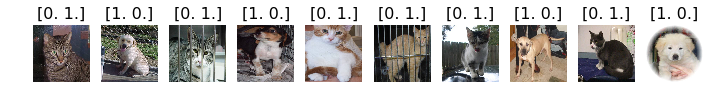

In [9]:
plots(imgs,titles = labels)

# Building and training CNN


In [10]:
model = Sequential([
    
    Conv2D(32,(3,3), activation='relu', input_shape=(224,224,3)),
    
    Flatten(),
    
    Dense(2, activation='softmax')
    
])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.compile(Adam(lr=0.0001), loss= 'categorical_crossentropy', metrics=['accuracy'])

In [12]:
# fit_generator fits the data generated batch by batch.
model.fit_generator(train_batches,steps_per_epoch=4,validation_data= valid_batches, validation_steps=4, epochs=5, verbose=2)


Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 1s - loss: 7.4108 - acc: 0.5250 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
 - 1s - loss: 7.2531 - acc: 0.5500 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
 - 1s - loss: 8.4620 - acc: 0.4750 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
 - 1s - loss: 7.6561 - acc: 0.5250 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
 - 1s - loss: 8.4620 - acc: 0.4750 - val_loss: 8.0590 - val_acc: 0.5000


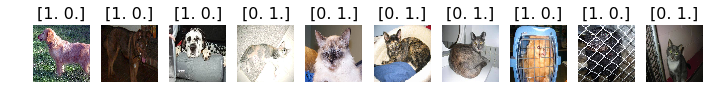

In [13]:
test_images, test_labels = next(test_batches)
plots(test_images, titles= test_labels)

In [14]:
#Labeling dog as 1 instead of [1,0] and cat being labeled as 0 instead of [0,1]

test_labels = test_labels[:,0]


In [15]:
test_labels

array([1., 1., 1., 0., 0., 0., 0., 1., 1., 0.], dtype=float32)

In [16]:
test_batches.class_indices

{'cat': 1, 'dog': 0}

In [17]:
#If you use ImageDataGenerator then you have to use fit_generator and predict_generator.

predictions = model.predict_generator(test_batches,steps = 1, verbose= 0)

In [18]:
predictions


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [19]:
cm = confusion_matrix(test_labels,predictions[:,0])

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

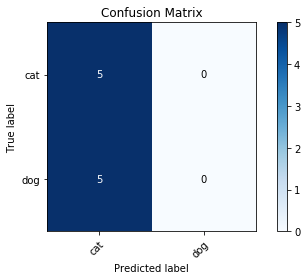

In [21]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm,cm_plot_labels)

Building Fine-tuned vgg16 model

In [22]:
vgg16_model = keras.applications.vgg16.VGG16()

In [23]:

vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [24]:
#As it is of type Model and we are working with Sequential we will need to transfrom it.
type(vgg16_model)


keras.engine.training.Model

In [25]:
#TO remove the last layer: 
vgg16_model.layers.pop()

vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [26]:
model = Sequential()

for layer in vgg16_model.layers:
    model.add(layer)
        

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [28]:
#Now we only want to add a new layer in the end with 2 nodes and we need not train the layers except the last one

for layer in model.layers:
    layer.trainable = False;

In [29]:
model.add(Dense(2, activation='softmax'))

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [31]:
model.compile(Adam(lr = 0.0001), loss= 'categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit_generator(train_batches,steps_per_epoch=4,validation_data=valid_batches,validation_steps=4,epochs=5,verbose=2)

Epoch 1/5
 - 9s - loss: 0.6660 - acc: 0.6500 - val_loss: 0.5871 - val_acc: 0.7500
Epoch 2/5
 - 9s - loss: 0.4270 - acc: 0.8250 - val_loss: 0.6749 - val_acc: 0.7500
Epoch 3/5
 - 9s - loss: 0.2915 - acc: 0.9000 - val_loss: 0.2175 - val_acc: 0.9375
Epoch 4/5
 - 9s - loss: 0.2062 - acc: 0.9250 - val_loss: 0.5272 - val_acc: 0.8125
Epoch 5/5
 - 9s - loss: 0.1434 - acc: 0.9250 - val_loss: 0.5458 - val_acc: 0.8125


# Predicting using fine-tuned model :

In [34]:

#From the classes list it will search in train_path for same class names and if found it will automatically assign labels
#to each image.

train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224), classes=['dog','cat'],batch_size=10)

valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),  classes=['dog','cat'],batch_size=4)

test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),  classes=['dog','cat'],batch_size=10)


Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


{'cat': 1, 'dog': 0}

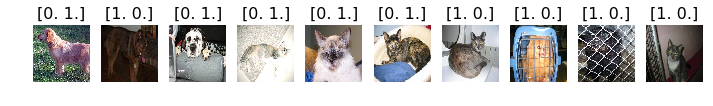

In [40]:
test_imgs, test_labels = next(test_batches)
plots(test_images, titles= test_labels)


train_batches.class_indices


In [62]:
test_labels = test_labels[:,0]
test_labels

array([0., 1., 0., 1., 1., 0., 0., 1., 0., 1.], dtype=float32)

In [63]:
predictions  = model.predict_generator(test_batches,steps = 1, verbose= 0)

In [64]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

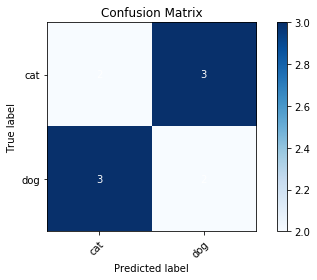

In [65]:
cm_plot_labels = ['cat','dog']

plot_confusion_matrix(cm,cm_plot_labels,title= "Confusion Matrix")

 # Data augmentation   

In [ ]:
gen = ImageDataGeneratorDataGeneratorDataGeneratorgeDataGeneratorgeDataGeneratorgeDataGeneratorgeDataGenerator()